##
Merkez Bankası'nın takip ettiği enflasyon eğilimi göstergelerinden biri SATRIM(Seasonal Adjustment Trimmed Inflation).Yani Mevsimsellikten Arındırılmış Budanmış Enflasyon.

Peki anlamı nedir?
Öncelikle TÜFE sepetindeki bütün maddelerin aylık artışları mevsimsellikten arındırılır.Sonrasında sepette artış oranı en çok ve en az olan belli oranda maddeler (örneğin sepetin %10'u) sepetten çıkarılır ve kalan maddelerle ağırlıklar güncellenir.Sonrasında kalan maddelerin ağırlıklı ortalaması hesaplanır ve o aya ait SATRIM değeri elde edilir.

Halihazırda TÜİK madde sepetini açıklamıyor ancak 5-Digit olarak bilinen harcama gruplarını endekslerini açıklıyor.Bunun üzerinden SATRIM hesaplamak mümkün.

Grafikte sepetin en çok artan ve azalan %10'luk maddeleri dışlayarak hesapladığım SATRIM'ı görebilirsiniz.

Diğer grafikte ise ana eğilimi daha net görmek açısından SATRIM'in 3 aylık hareketli ortalamasının ima ettiği yıllıklandırılmış enflasyon değerlerini gösterdim.

Son yıllıklandırılmış değer %38'e denk gelmekte,mayıs ayındaki doğalgaz etkisi ve temmuz ayındaki 6 aylık ÜFE zamları etkisini dışlarsak yıllıklandırılmış değer %26'ya denk geliyor.Son 3 aylarda yönetilen/yönlendirilen fiyatlarda zamlar olduğu için ana eğilimi daha rahat anlamamız için Kasım ayını beklememiz gerekiyor,Kasım ayında 3 aylık ortalamada bu etkiler tamamen gitmiş olacak.

Kodu incelemek için:https://lnkd.in/dNhGuz8i

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[2:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop([2],axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
data=data.dropna()
data

2,Alkolsüz içecekler,Alkollü içecekler,Tütün,Giyim,Ayakkabı,Gerçek kira,Konutun bakım ve onarımı,Su (Şebeke suyu) ve konutla ilgili çeşitli hizmetler,"Elektrik, gaz ve diğer yakıtlar","Mobilya, mefruşat, halı ve diğer yer döşemeleri",...,"Kişisel bakımda kullanılan diğer aletler, ürünler ve eşyalar","Mücevheratlar, saat ve kol saatleri",Seyahat malzemeleri ve diğer kişisel aksesuarlar,Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar,Sosyal hizmetler,Konut sigortası,Sağlık sigortası,Ulaştırma sigortası,Başka yerde sınıflandırılmayan diğer mali hizmetler,Başka yerde sınıflandırılmayan diğer hizmetler
2019-01-31,375.64,919.72,588.44,224.46,261.54,483.82,438.43,365.41,414.79,368.01,...,323.64,1228.81,498.16,465.99,436.18,286.91,433.33,572.88,658.86,561.95
2019-02-28,376.45,931.2,588.44,211.52,257.03,486.57,438.95,358.65,415.13,368.93,...,319.06,1227.76,490.9,460.09,440.28,288.92,438.24,578.11,673.69,562.13
2019-03-31,376.84,932.07,588.44,211.72,261.13,489.21,438.76,358.12,416.25,370.31,...,317.61,1255,489.87,459.34,444.11,290.05,443.9,587.67,673.69,562.31
2019-04-30,378.55,932.36,632.26,223.56,273.27,492.19,441.17,359.51,416.66,391.89,...,323.42,1301.63,494.62,457.62,447.7,290.5,453.9,592.27,673.69,567.4
2019-05-31,383.52,933.13,693.56,233.67,280.8,496.11,447.19,354.02,418.03,373.71,...,323.06,1364.22,497.36,462.32,451.36,290.38,455.23,597.88,673.69,567.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,2281.78,5080.27,3005.68,550.13,625.92,2503.01,2414.72,1746.43,1570.27,2353.26,...,1236,11132.76,868.52,1685.47,2943.05,1872.53,1496.05,3227.83,223.11,3173.51
2024-04-30,2310.18,5060.54,3322.1,573.78,660.79,2618.5,2485.91,1766.51,1532.26,2507.51,...,1270.94,11456.28,896.38,1770.73,2965.23,1931.06,1544.54,3413.23,223.11,3363.52
2024-05-31,2399.62,5228.8,3483.87,631.73,712.67,2761.59,2552.95,1762.49,1727.97,2551.74,...,1296.06,11347.64,889.94,1801.98,3046.81,1999.24,1646.59,3534.99,223.11,3368.65
2024-06-30,2448.95,5276.96,3483.87,629.04,704.7,2902.27,2582.05,1986.17,1736.65,2584.38,...,1321.97,11400.74,889.88,1890.64,3117.62,2056.57,1519.73,3468.52,223.11,3373.63


In [4]:
ağırlık=pd.read_excel("ağırlık.xlsx")
ağırlık

,Unnamed: 0,Ağırlık
0,Alkolsüz içecekler ve konsantre içecekler,0.342840
1,Ayakkabı onarımı ve kiralanması,0.008916
2,Bayanlar için kuaför ve benzeri hizmetler,0.337027
3,Başka yerde sınıflandırılamayan diğer gıda ürü...,0.369732
4,Başka yerde sınıflandırılmamış diğer kişisel a...,0.160269
...,...,...
136,Şarap,0.025199
137,Şarküteri ürünleri ve diğer et çeşitleri,0.678130
138,Şehir gazı ve doğalgaz,2.572441
139,Şeker,0.376916


In [5]:
data=data[ağırlık["Unnamed: 0"]]
data = data.loc[:,~data.columns.duplicated()].copy()

In [6]:
import os
from statsmodels.tsa.x13 import x13_arima_analysis
datasa=pd.DataFrame()
for col in data.columns:
    path=os.chdir(r'C:\Users\Bora\Desktop\x13as')
    #X13 ARIMA modülünü indirip bilgisayarınızdaki dosya yolunu vermeniz gerekmekte.
    try:
        ayrıs=x13_arima_analysis(data[col],x12path=path)
        datasa[col]=ayrıs.seasadj
    except:
        pass

In [8]:
datasa=datasa.pct_change()*100

In [11]:
datasa=datasa.dropna()

In [12]:
import numpy as np

def calculate_satrim(percentage_up,percentage_down):
    satrim=[]
    for row in datasa.index:
        ay=datasa.loc[row]
        ay=ay.sort_values(ascending=False).iloc[int(len(datasa.columns)*percentage_up):int(-len(datasa.columns)*percentage_down)]
        ay=ay.sort_index()
        ağırlıklar=ağırlık[ağırlık["Unnamed: 0"].isin(ay.index.values)]
        ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
        satrim.append(np.sum(ay.values*ağırlıklar["Ağırlık"])/100)
    return satrim


In [14]:
satrims=pd.DataFrame()
satrims["SATRIM%5"]=calculate_satrim(0.05,0.05)
satrims["SATRIM%10"]=calculate_satrim(0.1,0.1)
satrims["SATRIM%15"]=calculate_satrim(0.15,0.15)
satrims["SATRIM%20"]=calculate_satrim(0.20,0.2)
satrims["SATRIM%24-%31"]=calculate_satrim(0.31,0.24)
satrims=satrims.set_index(pd.to_datetime(data.index[1:]))
satrims

,SATRIM%5,SATRIM%10,SATRIM%15,SATRIM%20,SATRIM%24-%31
2019-02-28,0.637643,0.660658,0.662248,0.671229,0.630817
2019-03-31,0.531459,0.565155,0.703535,0.648655,0.718954
2019-04-30,0.989083,1.096534,1.074333,1.041020,0.994191
2019-05-31,1.451211,1.356099,1.263265,1.305776,1.282234
2019-06-30,0.664131,0.813000,0.899540,0.749208,0.705782
...,...,...,...,...,...
2024-03-31,3.207010,3.156015,3.179127,3.215834,2.990009
2024-04-30,3.218321,3.047108,3.336997,3.133564,2.942443
2024-05-31,3.370053,3.146713,3.473979,3.600236,3.517950
2024-06-30,1.822969,2.113109,2.035466,2.110080,1.748922


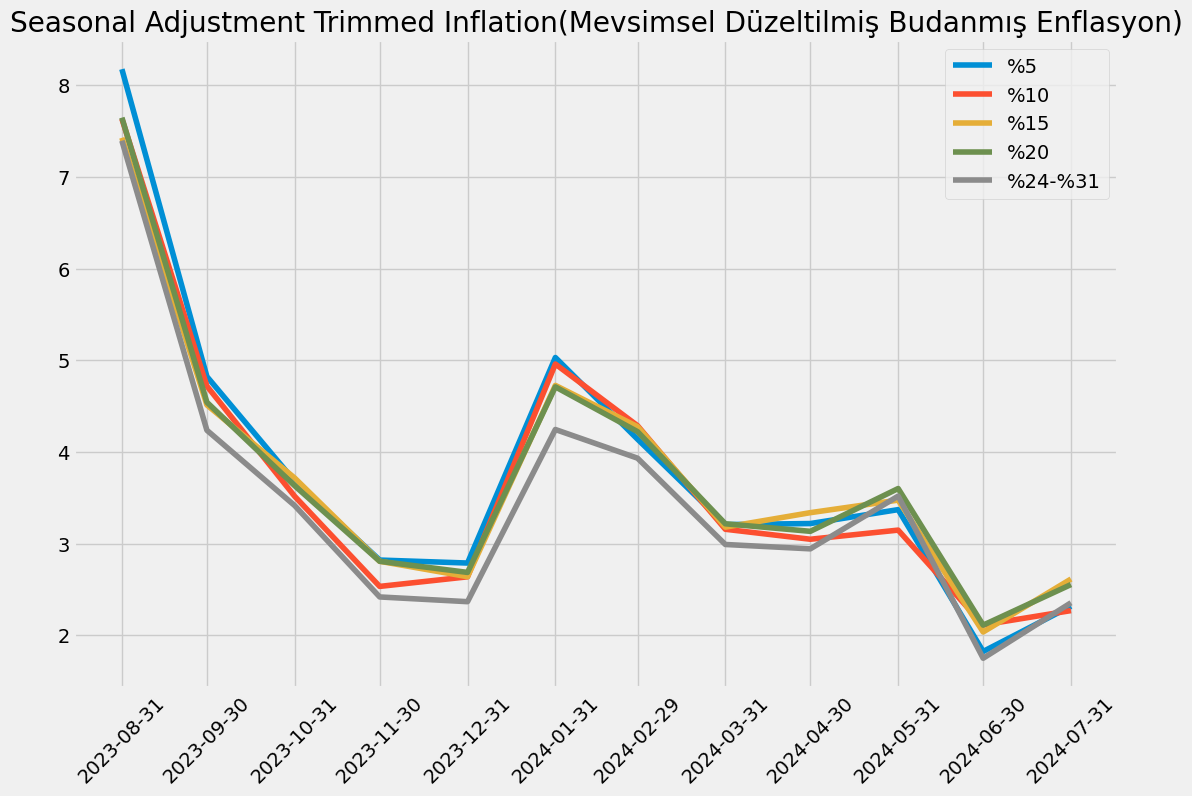

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Seasonal Adjustment Trimmed Inflation(Mevsimsel Düzeltilmiş Budanmış Enflasyon)")
plt.plot(satrims["SATRIM%5"].tail(12),label="%5")
plt.plot(satrims["SATRIM%10"].tail(12),label="%10")
plt.plot(satrims["SATRIM%15"].tail(12),label="%15")
plt.plot(satrims["SATRIM%20"].tail(12),label="%20")
plt.plot(satrims["SATRIM%24-%31"].tail(12),label="%24-%31")
plt.xticks(data.tail(12).index,rotation=45)
plt.legend()

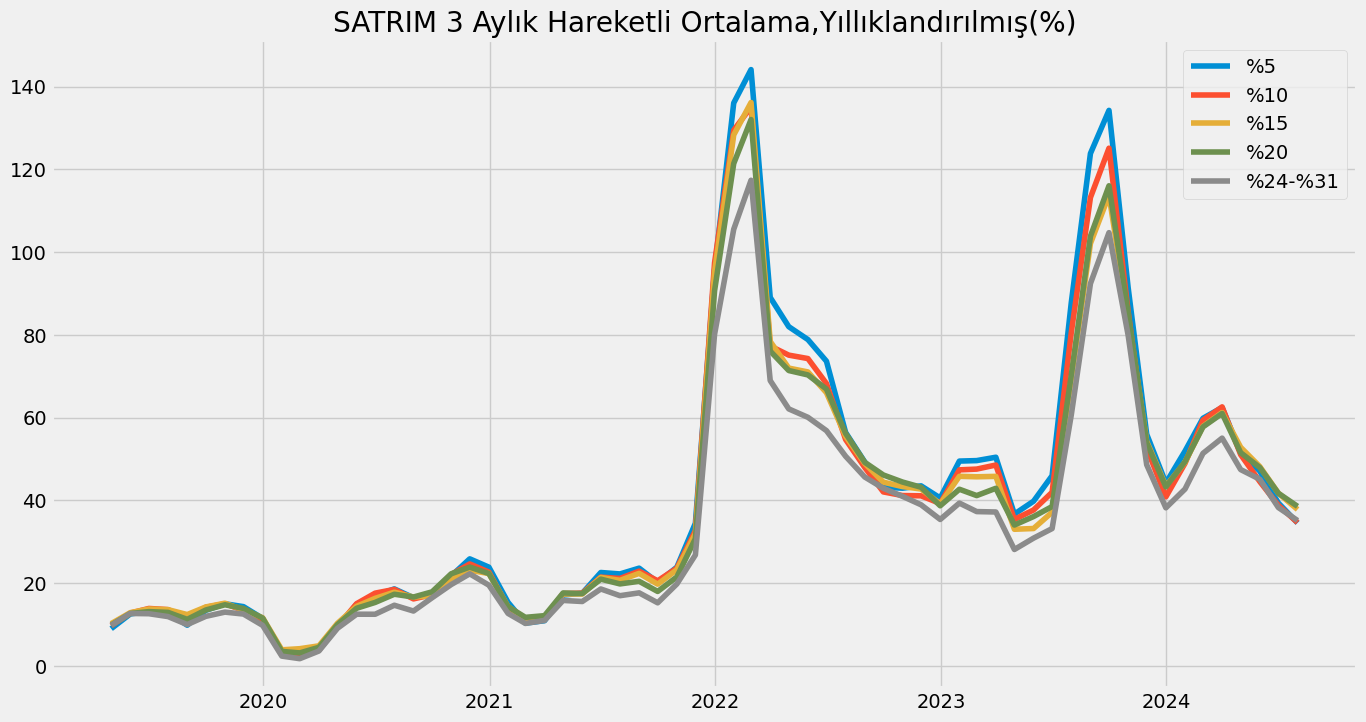

In [17]:
plt.figure(figsize=(15,8))
plt.title("SATRIM 3 Aylık Hareketli Ortalama,Yıllıklandırılmış(%)")
plt.plot((((1+(satrims["SATRIM%5"].rolling(3).mean()/100))**12)-1)*100,label="%5")
plt.plot((((1+(satrims["SATRIM%10"].rolling(3).mean()/100))**12)-1)*100,label="%10")
plt.plot((((1+(satrims["SATRIM%15"].rolling(3).mean()/100))**12)-1)*100,label="%15")
plt.plot((((1+(satrims["SATRIM%20"].rolling(3).mean()/100))**12)-1)*100,label="%20")
plt.plot((((1+(satrims["SATRIM%24-%31"].rolling(3).mean()/100))**12)-1)*100,label="%24-%31")
plt.legend()

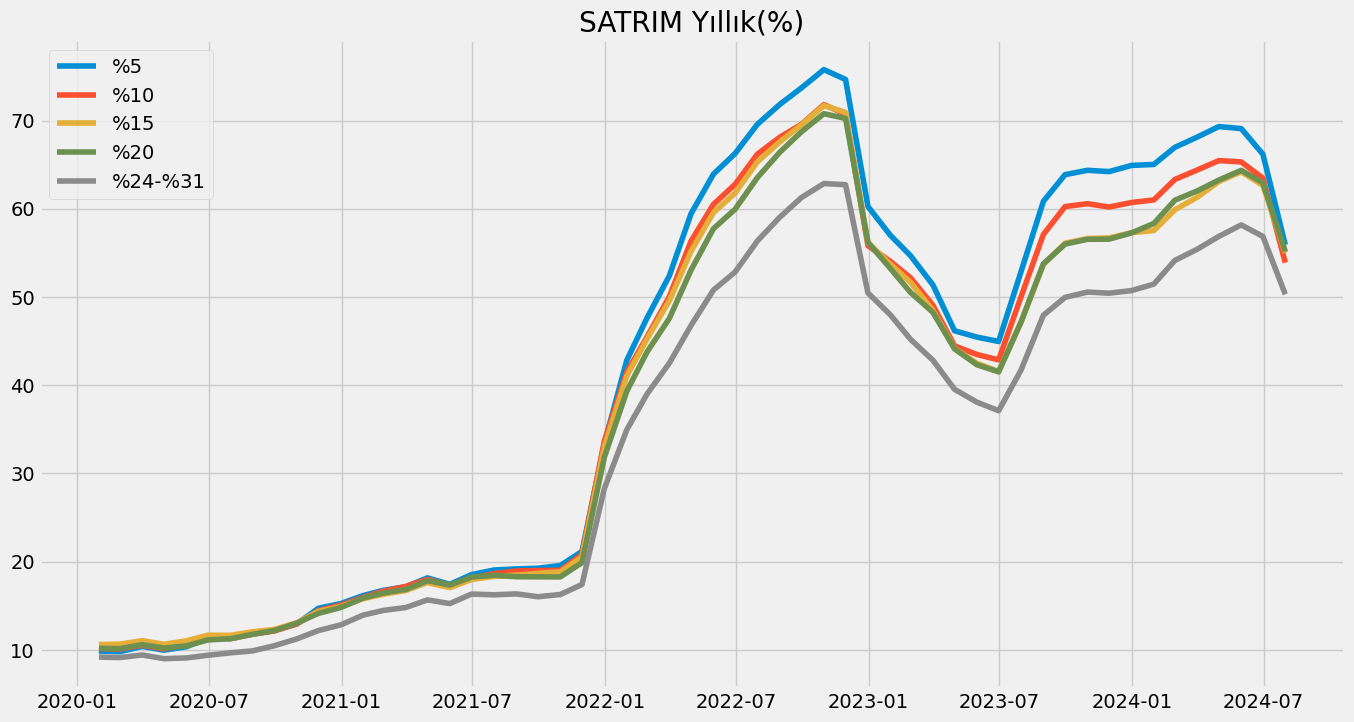

In [18]:
plt.figure(figsize=(15,8))
plt.title("SATRIM Yıllık(%)")
plt.plot(100*((1+(satrims["SATRIM%5"]/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="%5")
plt.plot(100*((1+(satrims["SATRIM%10"]/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="%10")
plt.plot(100*((1+(satrims["SATRIM%15"]/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="%15")
plt.plot(100*((1+(satrims["SATRIM%20"]/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="%20")
plt.plot(100*((1+(satrims["SATRIM%24-%31"]/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="%24-%31")
plt.legend()

In [21]:
path=os.chdir(r'C:\Users\Bora\Documents\Github\Enflasyon-SATRIM')

In [22]:
import evds
import requests
import json
from datetime import date
from urllib.parse import urlencode
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

params = {
    'series': "TP.FE.OKTG03",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tüfeB = formatted_response['items']
tüfeB = pd.DataFrame(tüfeB)


tüfeB = tüfeB.drop(columns=['UNIXTIME','Tarih'])
tüfeB.columns = ['TÜFEB']
tüfeB['TÜFEB'] = pd.to_numeric(tüfeB['TÜFEB'])
tüfeB=tüfeB.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tüfeB)))
tüfeB["Aylık"]=tüfeB["TÜFEB"].pct_change()*100


In [23]:
path=os.chdir(r'C:\Users\Bora\Desktop\x13as')
tüfebx13_endeks=x13_arima_analysis(tüfeB["TÜFEB"].dropna(),x12path=path)

In [24]:
import evds
import requests
import json
from datetime import date
from urllib.parse import urlencode
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tüfeC = formatted_response['items']
tüfeC = pd.DataFrame(tüfeC)


tüfeC = tüfeC.drop(columns=['UNIXTIME','Tarih'])
tüfeC.columns = ['TÜFEC']
tüfeC['TÜFEC'] = pd.to_numeric(tüfeC['TÜFEC'])
tüfeC=tüfeC.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tüfeC)))
tüfeC["Aylık"]=tüfeC["TÜFEC"].pct_change()*100


In [25]:
path=os.chdir(r'C:\Users\Bora\Desktop\x13as')
tüfecx13_endeks=x13_arima_analysis(tüfeC["TÜFEC"].dropna(),x12path=path)


In [26]:
egilim=pd.concat([satrims.mean(axis=1).tail(12),datasa.median(axis=1).tail(12),(tüfebx13_endeks.seasadj.pct_change()*100).tail(12),(tüfecx13_endeks.seasadj.pct_change()*100).tail(12)],axis=1)
egilim.columns=["SATRIM","Medyan","B","C"]
egilim

,SATRIM,Medyan,B,C
2023-08-31,7.654974,7.482938,10.105951,9.169738
2023-09-30,4.565931,4.089189,5.865035,5.478301
2023-10-31,3.590796,3.588146,3.631217,3.252288
2023-11-30,2.676769,2.657499,2.409295,2.791611
2023-12-31,2.623012,2.842207,4.323412,2.986604
2024-01-31,4.733354,4.350883,3.588558,7.876574
2024-02-29,4.170538,4.222094,3.614640,3.650768
2024-03-31,3.149599,3.235421,3.513948,3.407928
2024-04-30,3.135686,3.049851,3.251300,3.010573
2024-05-31,3.421786,3.540207,3.167108,2.924881


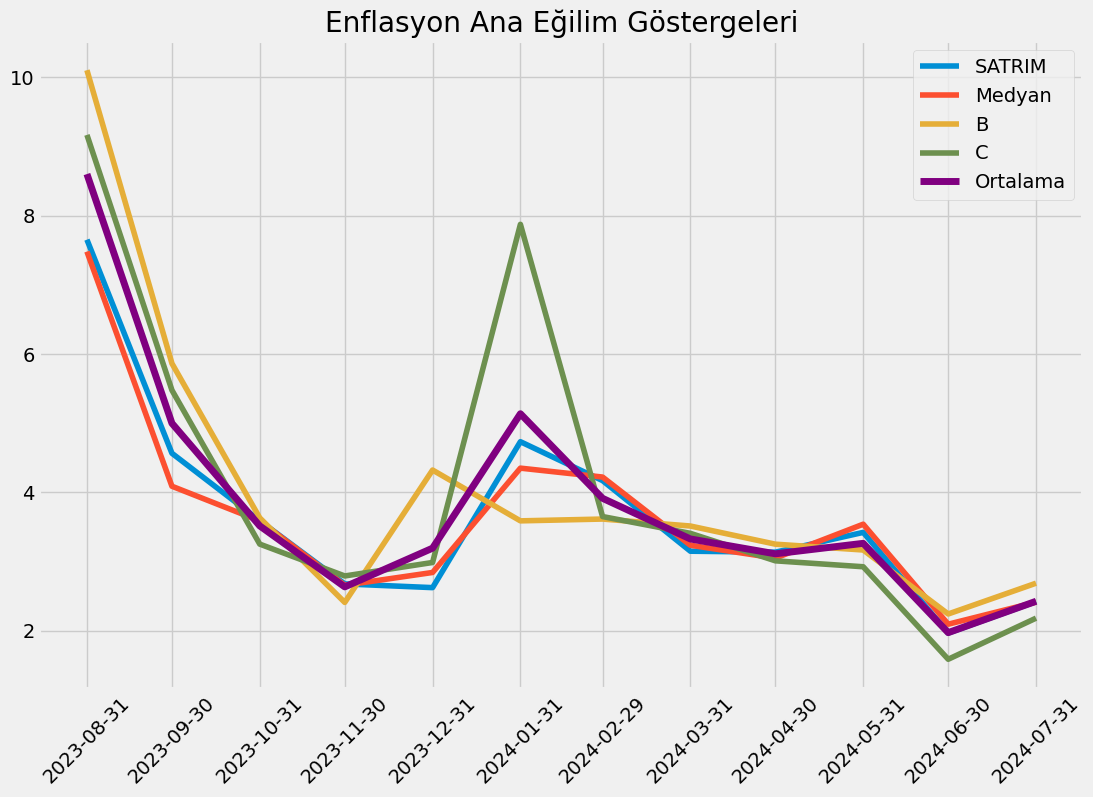

In [27]:
plt.figure(figsize=(12,8))
plt.title("Enflasyon Ana Eğilim Göstergeleri")
plt.plot(satrims.mean(axis=1).tail(12),label="SATRIM")
plt.plot(datasa.median(axis=1).tail(12),label="Medyan")
plt.plot((tüfebx13_endeks.seasadj.pct_change()*100).tail(12),label="B")
plt.plot((tüfecx13_endeks.seasadj.pct_change()*100).tail(12),label="C")
plt.plot(egilim.mean(axis=1),label="Ortalama",color="purple",linewidth=5)
plt.xticks(data.tail(12).index,rotation=45)
plt.legend()